In [2]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
conn = sqlite3.connect("../../db/proyectomacro.db")
cursor = conn.cursor()

In [4]:
df=pd.read_sql_query('SELECT * FROM PIB_Real_Gasto',conn)
conn.close()
df.set_index('año',inplace=True)
df_participacion=pd.DataFrame({
    'ct':df['gastos_consumo']/df['pib_real_base_1990'],
    'i':df['formacion_capital']/df['pib_real_base_1990'],
    'x':df['exportacion_bienes_servicios']/df['pib_real_base_1990'],
    'm':df['importacion_bienes']/df['pib_real_base_1990'],
    'c':df['consumo_privado']/df['pib_real_base_1990'],
    'g':df['consumo_publico']/df['pib_real_base_1990']
})
df_participacion.loc[1950:1956]

,ct,i,x,m,c,g
año,,,,,,
1950,0.873913,0.119565,0.163044,0.156522,0.789130,0.084783
1951,0.829146,0.160804,0.185930,0.175879,0.757538,0.071608
1952,0.850093,0.163873,0.172253,0.186220,0.790503,0.059590
1953,0.918404,0.102144,0.058666,0.079214,0.882370,0.036033
1954,0.875590,0.133699,0.043551,0.052840,0.846810,0.028780
1955,0.801664,0.208489,0.048077,0.058230,0.780048,0.021615
1956,0.827539,0.198716,0.133583,0.159838,0.791222,0.036317


In [5]:
## Dividir el DataFrame en los tres periodos históricos
df_periodo1 = df_participacion.loc[1952:1984]
df_periodo2 = df_participacion.loc[1985:2005]
df_periodo3 = df_participacion.loc[2006:2025]

# Calcular estadísticas descriptivas relevantes
stats_periodo1 = df_periodo1.describe().T[['mean', 'std', 'min', 'max']]
stats_periodo2 = df_periodo2.describe().T[['mean', 'std', 'min', 'max']]
stats_periodo3 = df_periodo3.describe().T[['mean', 'std', 'min', 'max']]

# Crear un DataFrame consolidado con las estadísticas de cada periodo
df_stats = pd.concat([stats_periodo1, stats_periodo2, stats_periodo3], axis=1)
df_stats.columns = pd.MultiIndex.from_product(
    [['1952-1984', '1985-2005', '2006-2025'], ['mean', 'std', 'min', 'max']]
)
df_stats


1952-1984                               1985-2005                      \
        mean       std       min       max      mean       std       min   
ct  0.862941  0.047396  0.770664  0.957307  0.892296  0.027271  0.822920   
i   0.169860  0.030724  0.102144  0.244426  0.156212  0.030470  0.110217   
x   0.192515  0.058604  0.043551  0.290643  0.219726  0.042974  0.168809   
m   0.225315  0.059752  0.052840  0.307846  0.268234  0.026389  0.228429   
c   0.764049  0.060667  0.667698  0.882370  0.757548  0.037685  0.663175   
g   0.098892  0.031187  0.021615  0.140976  0.134748  0.020017  0.094500   

             2006-2025                                
         max      mean       std       min       max  
ct  0.927418  0.814821  0.025717  0.755012  0.845816  
i   0.236065  0.194994  0.027273  0.138653  0.242336  
x   0.355481  0.310937  0.067545  0.220393  0.449066  
m   0.325825  0.319868  0.033886  0.251979  0.379605  
c   0.813983  0.689352  0.032632  0.622238  0.717426  
g   0.165211  0.123645  0.011686  0.109313  0.147088

   1952-1974                               1975-2005                      \
        mean       std       min       max      mean       std       min   
ct  0.875664  0.049567  0.770664  0.957307  0.873387  0.038165  0.810601   
c   0.788246  0.055542  0.667698  0.882370  0.741693  0.040922  0.663175   
g   0.087418  0.029453  0.021615  0.116226  0.131694  0.018859  0.090283   
i   0.163169  0.027842  0.102144  0.208489  0.165579  0.033682  0.110217   
x   0.174996  0.058873  0.043551  0.287317  0.223946  0.040186  0.168809   
m   0.213829  0.067630  0.052840  0.307846  0.262912  0.025419  0.222855   

             2006-2025                                
         max      mean       std       min       max  
ct  0.927418  0.814821  0.025717  0.755012  0.845816  
c   0.813983  0.689352  0.032632  0.622238  0.717426  
g   0.165211  0.123645  0.011686  0.109313  0.147088  
i   0.244426  0.194994  0.027273  0.138653  0.242336  
x   0.355481  0.310937  0.067545  0.220393  0.449066  
m   0.

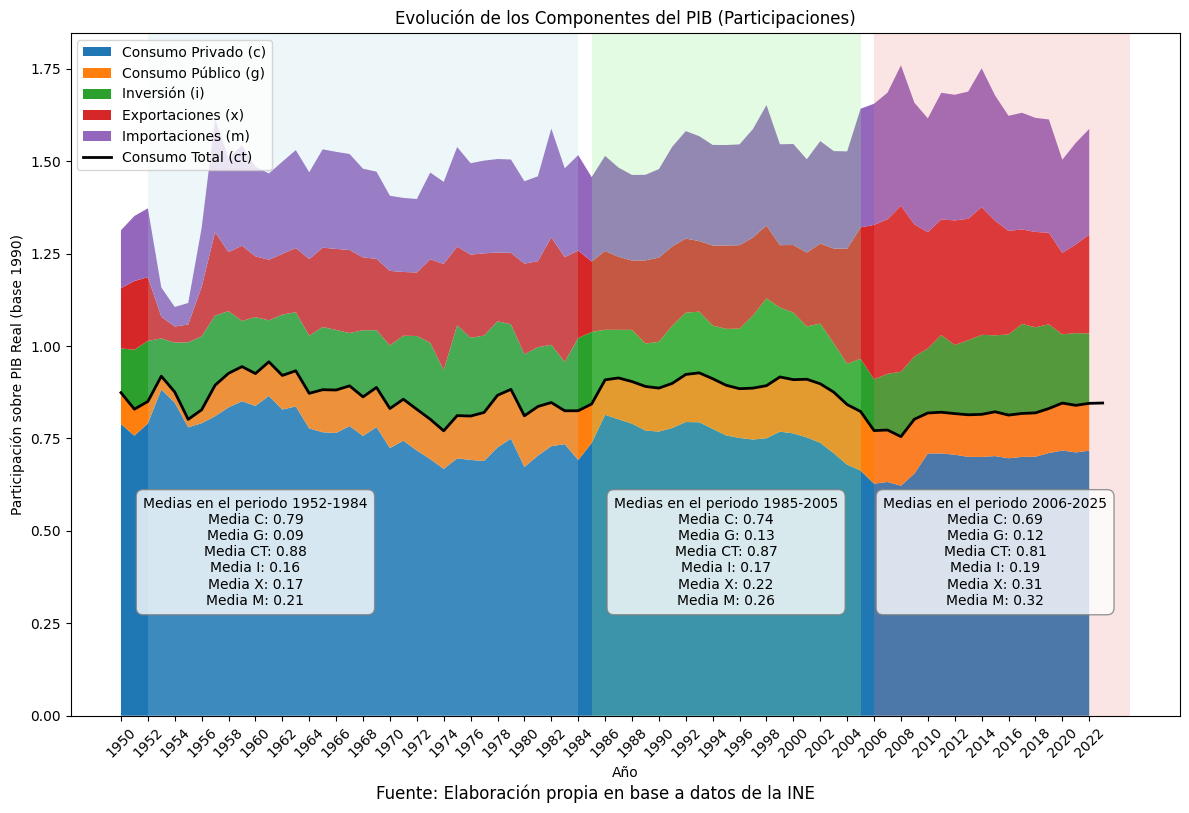

In [6]:
# Definir directorio de salida y crearlo si no existe
output_dir = "../../assets/imagenes"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# Dividir el DataFrame en tres periodos históricos
periodos = {
    '1952-1974': df_participacion.loc[1952:1974],
    '1975-2005': df_participacion.loc[1975:2005],
    '2006-2025': df_participacion.loc[2006:2025]
}

# Columnas de interés
cols = ['ct', 'c', 'g', 'i', 'x', 'm']

# Calcular estadísticas descriptivas para cada periodo
stats_dict = {}
for periodo, dfp in periodos.items():
    stats = dfp[cols].describe().T[['mean', 'std', 'min', 'max']]
    stats_dict[periodo] = stats

df_stats = pd.concat(stats_dict, axis=1)
df_stats.columns = pd.MultiIndex.from_product([list(stats_dict.keys()), ['mean', 'std', 'min', 'max']])
print(df_stats)

# Además, para las anotaciones en la gráfica, calculamos las medias (puedes ajustar los periodos según convenga)
media_p1 = {
    'c': periodos['1952-1974']['c'].mean(),
    'g': periodos['1952-1974']['g'].mean(),
    'ct': periodos['1952-1974']['ct'].mean(),
    'i': periodos['1952-1974']['i'].mean(),
    'x': periodos['1952-1974']['x'].mean(),
    'm': periodos['1952-1974']['m'].mean()
}
media_p2 = {
    'c': periodos['1975-2005']['c'].mean(),
    'g': periodos['1975-2005']['g'].mean(),
    'ct': periodos['1975-2005']['ct'].mean(),
    'i': periodos['1975-2005']['i'].mean(),
    'x': periodos['1975-2005']['x'].mean(),
    'm': periodos['1975-2005']['m'].mean()
}
media_p3 = {
    'c': periodos['2006-2025']['c'].mean(),
    'g': periodos['2006-2025']['g'].mean(),
    'ct': periodos['2006-2025']['ct'].mean(),
    'i': periodos['2006-2025']['i'].mean(),
    'x': periodos['2006-2025']['x'].mean(),
    'm': periodos['2006-2025']['m'].mean()
}

# Definir textos para las anotaciones (ejemplo usando medias de consumo privado, público, total, inversión, exportaciones e importaciones)
text_p1 = (
    "Medias en el periodo 1952-1984\n"
    f"Media C: {media_p1['c']:.2f}\n"
    f"Media G: {media_p1['g']:.2f}\n"
    f"Media CT: {media_p1['ct']:.2f}\n"
    f"Media I: {media_p1['i']:.2f}\n"
    f"Media X: {media_p1['x']:.2f}\n"
    f"Media M: {media_p1['m']:.2f}"
)
text_p2 = (
    "Medias en el periodo 1985-2005\n"
    f"Media C: {media_p2['c']:.2f}\n"
    f"Media G: {media_p2['g']:.2f}\n"
    f"Media CT: {media_p2['ct']:.2f}\n"
    f"Media I: {media_p2['i']:.2f}\n"
    f"Media X: {media_p2['x']:.2f}\n"
    f"Media M: {media_p2['m']:.2f}"
)
text_p3 = (
    "Medias en el periodo 2006-2025\n"
    f"Media C: {media_p3['c']:.2f}\n"
    f"Media G: {media_p3['g']:.2f}\n"
    f"Media CT: {media_p3['ct']:.2f}\n"
    f"Media I: {media_p3['i']:.2f}\n"
    f"Media X: {media_p3['x']:.2f}\n"
    f"Media M: {media_p3['m']:.2f}"
)

# Crear la gráfica
fig, ax = plt.subplots(figsize=(12, 8))

# Para la gráfica, se puede usar stackplot para las áreas. 
# Considera que el consumo total (ct) es la suma de consumo privado (c) y público (g).
# Aquí mostramos el desglose del consumo (c y g) junto a inversión, exportaciones e importaciones.
ax.stackplot(df_participacion.index,
             df_participacion['c'],
             df_participacion['g'],
             df_participacion['i'],
             df_participacion['x'],
             df_participacion['m'],
             labels=['Consumo Privado (c)', 'Consumo Público (g)', 'Inversión (i)', 'Exportaciones (x)', 'Importaciones (m)'])

# También se puede superponer una línea para el Consumo Total (ct), que debería igualar c+g.
ax.plot(df_participacion.index, df_participacion['ct'], color='black', lw=2, label='Consumo Total (ct)')

ax.set_xlabel('Año')
ax.set_ylabel('Participación sobre PIB Real (base 1990)')
ax.set_title('Evolución de los Componentes del PIB (Participaciones)')
ax.legend(loc='upper left')
ax.set_xticks(df_participacion.index[::2])
ax.set_xticklabels(df_participacion.index[::2], rotation=45)

# Configurar propiedades del recuadro para las anotaciones
bbox_props = dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray", alpha=0.8)

# Agregar las anotaciones para cada periodo en posiciones escogidas (ajusta las coordenadas según convenga)
ax.text(1960, 0.3, text_p1, fontsize=10, color='black', bbox=bbox_props, ha='center')
ax.text(1995, 0.3, text_p2, fontsize=10, color='black', bbox=bbox_props, ha='center')
ax.text(2015, 0.3, text_p3, fontsize=10, color='black', bbox=bbox_props, ha='center')

# Sombrear los periodos históricos
ax.axvspan(1952, 1984, facecolor='lightblue', alpha=0.21)
ax.axvspan(1985, 2005, facecolor='lightgreen', alpha=0.25)
ax.axvspan(2006, 2025, facecolor='lightcoral', alpha=0.21)

plt.tight_layout()
plt.figtext(0.5, -0.005, "Fuente: Elaboración propia en base a datos de la INE", ha="center", fontsize=12, color='black')
plt.savefig(os.path.join(output_dir, ), bbox_inches='tight', dpi=300)
plt.show()
plt.close()